In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# El tratamiento de las variables categóricas

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/ecom-expense/Ecom Expense.csv")

In [22]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [ ]:
# de este dataset nos interesa con el monthly income predecir el total spend dependiendo del género, city tier, edad
# observamos que gender y city tier son categóricas

In [ ]:
# creamos vbles dummy

In [23]:
dummy_gender = pd.get_dummies(df["Gender"],prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix = "City")

In [24]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [25]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
# ojo, estos dataframe dummy no forman parte del df principal
# tenemos que incluirlos

In [32]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [33]:
df_new = df[column_names].join(dummy_gender)

In [34]:
column_names = df_new.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [35]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [36]:
df_new = df_new[column_names].join(dummy_city_tier)

In [37]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [ ]:
# de este dataset ahora nos sobran columnas que no necesitamos

In [38]:
#definimos las vbles predictoras:

feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female" , "Gender_Male", "City_Tier 1","City_Tier 2","City_Tier 3"]

In [39]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [40]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [41]:
print(lm.intercept_)
print(lm.coef_)

3655.729407690651
[   0.15297825    0.12372609  -94.15779883   94.15779883  119.6632516
  -16.67901801 -102.9842336 ]


In [42]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.15297824609320526),
 ('Transaction Time', 0.12372608642619987),
 ('Gender_Female', -94.15779883032009),
 ('Gender_Male', 94.15779883032002),
 ('City_Tier 1', 119.66325160390076),
 ('City_Tier 2', -16.679018007990088),
 ('City_Tier 3', -102.98423359591062)]

In [43]:
lm.score(X,Y) # nos da un R2 bajo

0.19478920552885381

In [ ]:
# si necesitamos refinar el modelo para aumentar eficacia, habrá que meterle las vbles no usadas

In [ ]:
# añado Records

In [44]:
feature_cols2 = ["Monthly Income", "Transaction Time", "Gender_Female" , "Gender_Male", "City_Tier 1","City_Tier 2","City_Tier 3","Record"]

In [45]:
X2 = df_new[feature_cols2]
Y2 = df_new["Total Spend"]

In [46]:
lm2 = LinearRegression()
lm2.fit(X2,Y2)

LinearRegression()

In [47]:
print(lm2.intercept_)
print(lm2.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [48]:
lm2.score(X2,Y2) # vemos que ha mejorado mucho

0.9179923586131016

In [ ]:
# añado edad

In [49]:
feature_cols3 = ["Monthly Income", "Transaction Time", "Gender_Female" , "Gender_Male", "City_Tier 1","City_Tier 2","City_Tier 3","Record", "Age "]

In [50]:
X3 = df_new[feature_cols3]
Y3 = df_new["Total Spend"]

In [51]:
lm3 = LinearRegression()
lm3.fit(X3,Y3)

LinearRegression()

In [52]:
print(lm3.intercept_)
print(lm3.coef_)

-335.7380017453761
[ 1.47442269e-01  1.56391583e-01 -1.33088707e+02  1.33088707e+02
  7.83785050e+01  5.20259633e+01 -1.30404468e+02  7.72149205e+02
  6.42429817e+00]


In [53]:
lm3.score(X3,Y3) # apenas ha subido

0.9187458997709432

In [ ]:
# añado items:

In [54]:
feature_cols4 = ["Monthly Income", "Transaction Time", "Gender_Female" , "Gender_Male", "City_Tier 1","City_Tier 2","City_Tier 3","Record", " Items "]

In [55]:
X4 = df_new[feature_cols4]
Y4 = df_new["Total Spend"]

In [56]:
lm4 = LinearRegression()
lm4.fit(X4,Y4)

LinearRegression()

In [57]:
print(lm4.intercept_)
print(lm4.coef_)

-399.1428912051506
[ 1.47826989e-01  1.67749327e-01 -1.29629282e+02  1.29629282e+02
  6.82638032e+01  5.34011082e+01 -1.21664911e+02  7.71518139e+02
  3.96330230e+01]


In [58]:
lm4.score(X4,Y4)

0.9216575112490167

In [ ]:
# si nos quedamos con el lm2 entonces el modelo es:

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648

    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648

    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648

    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648

    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [59]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [60]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [61]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [62]:
SSD

1517733985.340816

In [63]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols2)-1))
RSE

803.1318809818165

In [64]:
sales_mean = np.mean(df_new["Total Spend"])

In [65]:
sales_mean

6163.176415976715

In [66]:
error = RSE / sales_mean
error

0.1303113568029416

In [ ]:
# se trata de un error del 13%
# concluimos que el modelo es preciso

# Vamos a eliminar las variables dummy redundantes

In [82]:
dummy_gender = pd.get_dummies(df["Gender"],prefix="Gender").iloc[:,1]
dummy_gender.head()

0    0
1    0
2    1
3    0
4    0
Name: Gender_Male, dtype: uint8

In [85]:
dummy_tier2 = pd.get_dummies(df["City Tier"],prefix="City").iloc[:,1:]
dummy_tier2.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [86]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_tier2)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [87]:
#definimos las vbles predictoras:

feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2","City_Tier 3", "Record"]

In [88]:
X=df_new[feature_cols]
Y=df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [89]:
print(lm.intercept_)

-133.67781754642238


In [90]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205752),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.625351701262886),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445638)]

In [91]:
lm.score(X,Y)

0.9179923586131016

In [ ]:
# observamos que el R2 no ha cambiado con el modelo de arriba, simplemente hemos reducido el número de variables dummy

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

Pequeño script para escribir la formula y ademas no tener en cuenta la forma en que estan escritos los titulos de las columnas:



In [ ]:
column_names=data1.columns.values.tolist()
feature_cols=[column_names[3],column_names[4],column_names[5],column_names[9],column_names[10], column_names[11]]
x=data1[feature_cols]
y=data1[column_names[8]]
lm=LinearRegression()
lm.fit(x,y)
FormTxt="TotalSpend="+str(lm.intercept_)
for i in range(6):
   FormTxt=FormTxt+" + "+str(lm.coef_[i])+" x "+str(feature_cols[i])
print (FormTxt)

# Transformación de variables para conseguir una relación no lineal

In [ ]:
# a veces la relación entre las vbles predictoras y la que queremos precedir no es linea, puede ser cuadrática, polinómica....

In [ ]:
# si queremos ver si la relación es lineal o no, podemos hacer un plot

In [92]:
import pandas as pd

In [93]:
data_auto = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/auto/auto-mpg.csv")

In [94]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [95]:
data_auto.shape

(406, 9)

In [ ]:
# vamos a hacer un plot de mpg y horsepower

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
data_auto["mpg"]=data_auto["mpg"].dropna()
data_auto["horsepower"]=data_auto["horsepower"].dropna()

Text(0.5, 1.0, 'Horse Power vs mpg')

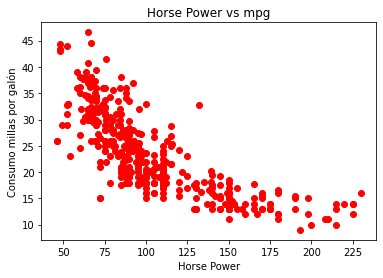

In [98]:
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Horse Power")
plt.ylabel("Consumo millas por galón")
plt.title("Horse Power vs mpg")

In [ ]:
# aquí observamos una curva, no una linea. entonces la relación puede ser exponencial o cuadrática con forma de parábola.


In [ ]:
# de todos modos, podemos tratar de hacer una relación lineal y si vemos que no funciona, buscamos la otra relación

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [99]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis] # hemos tenido que transformar la X así porque por sí sola no podiamos sacar su lm. La hemos añadido un nuevo eje

<ipython-input-99-76de3bf9ffcd>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X[:,np.newaxis] # hemos tenido que transformar la X así porque por sí sola no podiamos sacar su lm. La hemos añadido un nuevo eje


In [100]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [101]:
type(X)

pandas.core.series.Series

In [102]:
type(X_data)

numpy.ndarray

In [103]:
%matplotlib inline

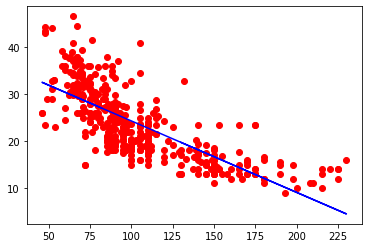

In [104]:
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [105]:
lm.score(X_data, Y) # nos da un R2 no muy alto

0.5746533406450252

In [106]:
SSD = np.sum((Y - lm.predict(X_data))**2)

In [107]:
RSE = np.sqrt(SSD/(len(X_data)-1))

In [108]:
y_mean = np.mean(Y)

In [109]:
error = RSE / y_mean

In [110]:
SSD, RSE, y_mean, error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

In [ ]:
# no está mal, podríamos llegar a aceptarlo....pero se puede hacer mejor

In [ ]:
# vamos a sacar un modelo de regresión cuadrático

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2 

In [111]:
X_data = X**2
X_data = X_data[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

<ipython-input-111-df184dac5a65>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:,np.newaxis]


In [112]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [113]:
lm.score(X_data, Y) # ha bajado en vez de subir!!!

0.4849887034823205

In [114]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(12490.350340501926,
 5.553410772769817,
 23.514572864321607,
 0.23616889852998113)

In [ ]:
# el error ha aumentado incluso!!! 

In [ ]:
# intentamos ahora un modelo de regresión lineal y cuadrático

### Modelo de regresión  lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [116]:
poly = PolynomialFeatures(degree = 2)

In [117]:
X_data = poly.fit_transform(X[:,np.newaxis])

<ipython-input-117-9fe0cf666176>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])


In [118]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [119]:
lm.score(X_data,Y) # nos da el R2 más alto por ahora

0.6439066584257469

In [120]:
lm.intercept_

55.026192447081144

In [121]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

Tendríamos este modelo:

mpg = 55.026 -0.434 * hp + 0.00112615 * hp^2

In [ ]:
# podríamos seguir intentando aumentar el grado del polinomio hasta dar con un modelo más preciso

In [122]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [123]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))
    print("")

Regresión de grado 2
R2:0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.6379546619069%

Regresión de grado 3
R2:0.6444678885560744
58.44877411148572
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.514572864321607, error: 19.622473106036686%

Regresión de grado 4
R2:0.6467674189704502
40.09664384880571
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.55891250126879%

Regresión de grado 5
R2:0.6547512491371936
-40.69402885502241
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.17138877377, RSE: 4.546921734122057, Y_mean: 23.514572864321607, error: 19.336612067578947%

Regresión de grado 6
R2:0.6572852671632741
-156.985207064

<ipython-input-123-e750fdee6a70>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
<ipython-input-123-e750fdee6a70>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
<ipython-input-123-e750fdee6a70>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
<ipython-input-123-e750fdee6a70>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before index

# El problema de los outliers
Los outliers son puntos que están alejados del resto de puntos del dataset.

Estos puntos pueden trastocar el modelo o modificarlo incluso.

Típicamente son menos de 1%.


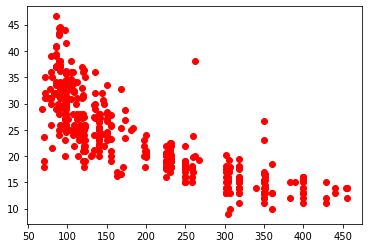

In [126]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [ ]:
# nos encontramos en la gráfica con puntos fuera de sitio.

In [131]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X,Y)

<ipython-input-131-eac863f5ef2f>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


LinearRegression()

# OJO, añadimos 


```
# X[:,np.newaxis]
```
cuando nos sale este error: 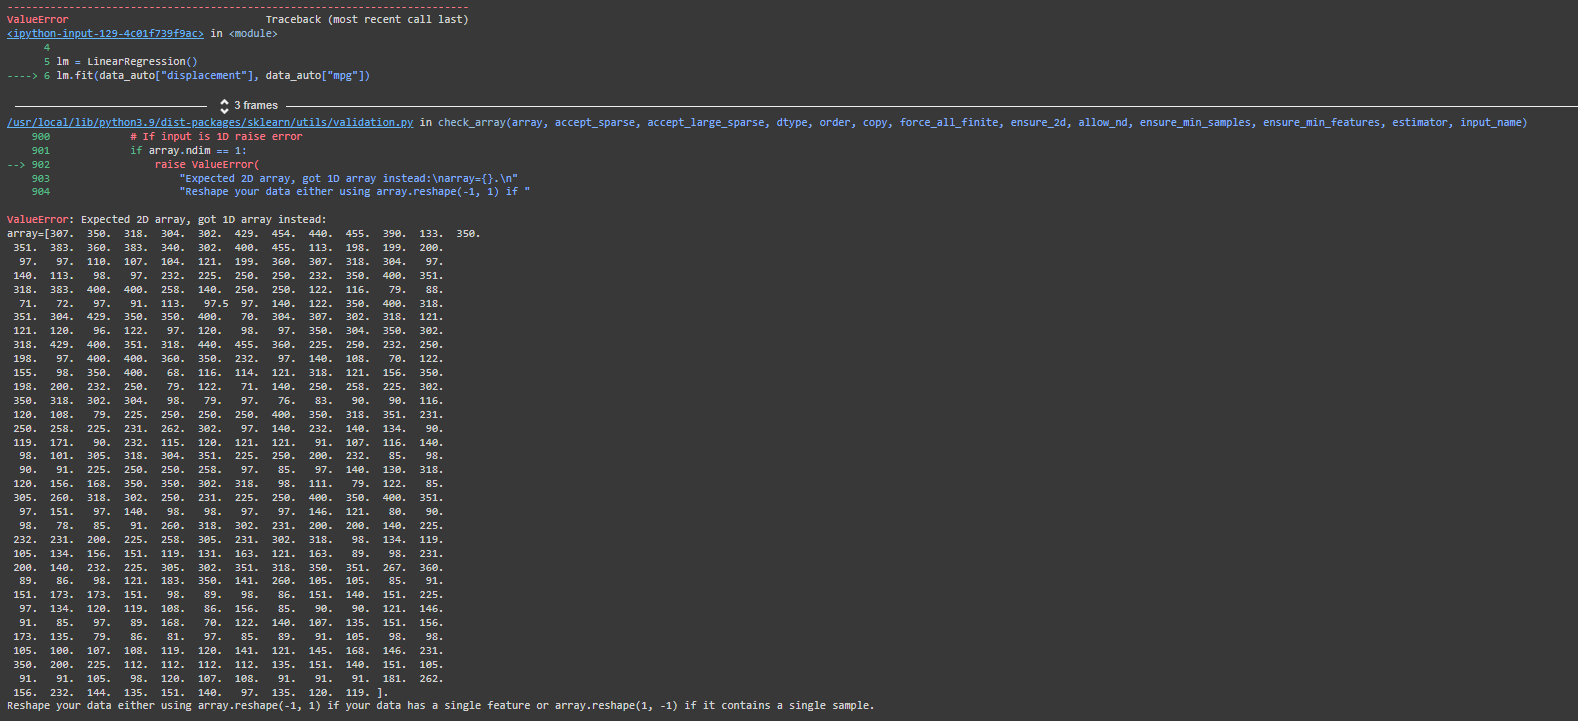


In [132]:
lm.score(X,Y)

0.6261049762826918

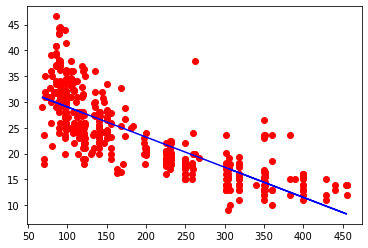

In [133]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

In [ ]:
# nos sale una R2 más o menos buena, pero nos preguntamos si quitando los outliers nos saldría mejor

In [135]:
# voy a localizar a los outlier:

data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [136]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [137]:
# elimino los puntos outliers:

data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [138]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X,Y)

<ipython-input-138-a8d63aa5006d>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


LinearRegression()

In [139]:
lm.score(X,Y)

0.6466514317531822

In [ ]:
# hemos aumentado algo más el R2

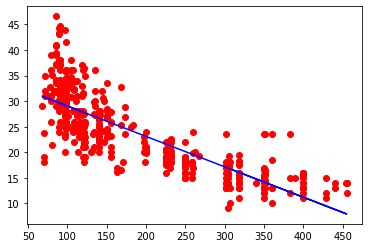

In [140]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

In [ ]:
# los box.plots también son buenos para detectar los outliers